# Compara dados da BGA do Cartao e Argos

In [41]:
import os
import pandas as pd
import matplotlib.pylab as pl

In [62]:
#carrega dados

pathname = os.environ['HOME'] + '/Dropbox/atmosmarine/data/BGA/'

card = pd.read_csv(pathname + 'BGA_card.csv', parse_dates=['date'], index_col=['date'])

dateparse = lambda x: pd.datetime.strptime(x,' %Y %m %d %H %M') 
argos = pd.read_csv(pathname + 'BGA_argos.csv', parse_dates=[[1,2,3,4,5]],
                    date_parser=dateparse, index_col='yyyy_ mm_ dd_ hour_ min')

In [65]:
card.columns

Index(['Received', 'Year', 'MonthDay', 'Time', 'Buoy ID', 'Location',
       'Number of Zero Crossings', 'Average Wave Height (Havg)', 'Tz',
       'Max Wave Height (Hmax)', 'Significant Wave Height (Hsig)',
       'Significant Wave Period (Tsig)', 'H 10', 'T 10', 'Mean Period',
       'Peak Period', 'Tp5', 'Hm0', 'Mean Magnetic Direction', 'Mean Spread',
       'Mean True Direction', 'Te', 'Wave Steepness', 'date.1'],
      dtype='object')

In [66]:
argos.columns

Index(['id_argos', ' lon', ' lat', 'flag', 'position_status',
       'battery_voltage', 'solar_current', 'boot_times', 'flood_level',
       'avg_wind_int1', 'wind_gust1', 'wind_dir1', 'avg_wind_int2',
       'avg_wind_gust2', 'avg_wind_dir2', 'spare1', 'spare2', 'spare3',
       'spare4', 'spare5', 'spare6', 'spare7', 'avg_wind_int1_f2',
       'wind_gust1_f2', 'wind_dir1_f2', 'temp_air', 'rel_humid', 'dew_point',
       'pressure', 'sst', 'buoy_heading', 'clh', 'turb', 'avg_radiation',
       'CM_int1', 'CM_dir1', 'CM_int2', 'CM_dir2', 'CM_int3', 'CM_dir3', 'HS',
       'H_max', 'Tp', 'Mn_dir', 'Mn_spread', 'spare24', 'spare25'],
      dtype='object')

(0, 360)

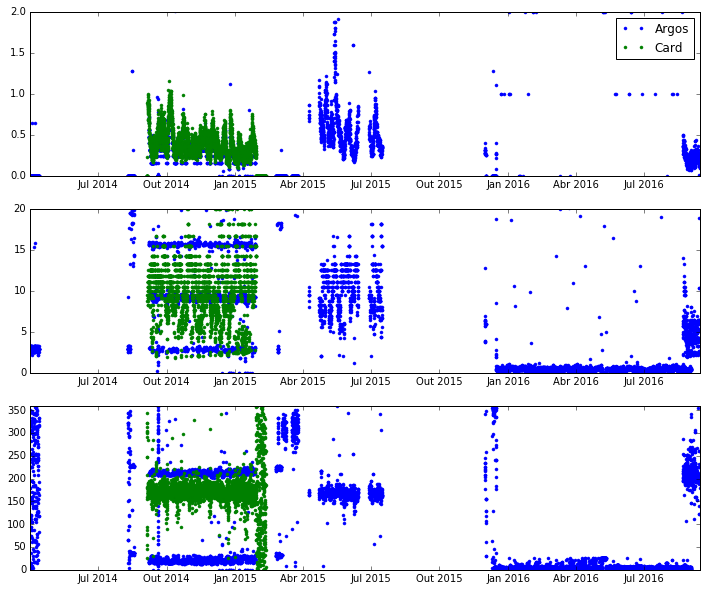

In [97]:
%matplotlib inline

fig = pl.figure(figsize=(12,10))

ax1 = fig.add_subplot(311)
ax1.plot(argos.index, argos.HS,'.', label='Argos')
ax1.plot(card.index, card['Significant Wave Height (Hsig)'],'.', label='Card')
ax1.legend()
ax1.set_ylim(0,2)

ax2 = fig.add_subplot(312)
ax2.plot(argos.index, argos.Tp,'.', label='Argos')
ax2.plot(card.index, card['Peak Period'],'.', label='Card')
ax2.set_ylim(0,20)

ax3 = fig.add_subplot(313)
ax3.plot(argos.index, argos.Mn_dir,'.', label='Argos')
ax3.plot(card.index, card['Mean Magnetic Direction'],'.', label='Card')
ax3.set_ylim(0,360)

(735480.625, 735639.625)

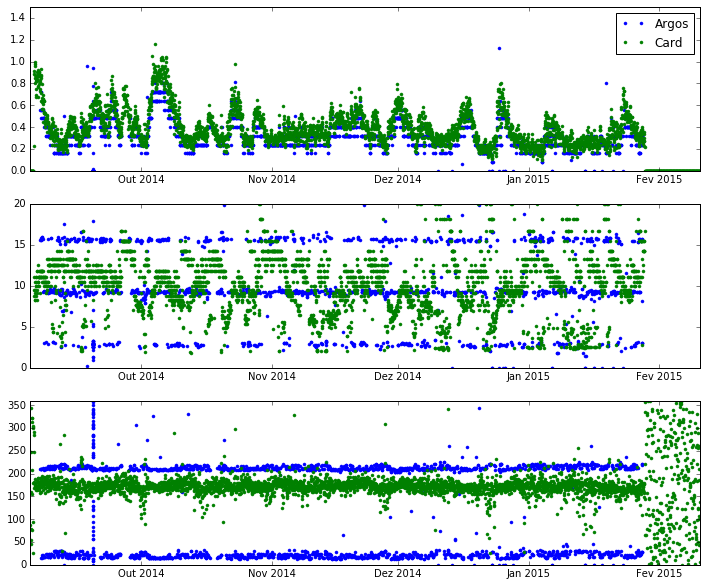

In [100]:
#com zoom nos dados concomitantes

%matplotlib inline

fig = pl.figure(figsize=(12,10))

ax1 = fig.add_subplot(311)
ax1.plot(argos.index, argos.HS,'.', label='Argos')
ax1.plot(card.index, card['Significant Wave Height (Hsig)'],'.', label='Card')
ax1.legend()
ax1.set_ylim(0,1.5)
ax1.set_xlim(card.index[0], card.index[-1])

ax2 = fig.add_subplot(312)
ax2.plot(argos.index, argos.Tp,'.', label='Argos')
ax2.plot(card.index, card['Peak Period'],'.', label='Card')
ax2.set_ylim(0,20)
ax2.set_xlim(card.index[0], card.index[-1])

ax3 = fig.add_subplot(313)
ax3.plot(argos.index, argos.Mn_dir,'.', label='Argos')
ax3.plot(card.index, card['Mean Magnetic Direction'],'.', label='Card')
ax3.set_ylim(0,360)
ax3.set_xlim(card.index[0], card.index[-1])
